In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import acquisition
import clean
import importing

## Reading file

In [4]:
data=acquisition.open_file('../input/suicides.csv')

Reading csv file...


In [5]:
data_clean=data.copy()

In [6]:
print(data_clean['country'].dtype)

object


## Cleaning data

def delete_columns(dataframe,lista):
    for i in lista:
        dataframe.drop([i], axis=1, inplace = True)

In [7]:
def delete_rows(dataframe,lista):
    for i in lista:
        dataframe.drop([i], axis=0, inplace = True)

def delete_rows_excluding(dataframe,column,condition):
    dataframe=dataframe[dataframe[column] != condition]
    dataframe.reset_index(drop=True)
    return dataframe
    

columnstodelete=['HDI for year','country-year']

In [8]:
clean.delete_columns(data_clean,['HDI for year','country-year'])

Deleting columns...


In [9]:
data_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [10]:
#data_clean = clean.delete_rows_excluding(data_clean,'country','Saint Vincent and Grenadines')

In [11]:
#data_clean = clean.resetindex(data_clean)

In [12]:
rows = data_clean.loc[data_clean['country']=='Saint Vincent and Grenadines']

In [13]:
rowsind = list(rows.index)
#data_clean= delete_rows(data_clean,rowsind)
rowsind

[21632,
 21633,
 21634,
 21635,
 21636,
 21637,
 21638,
 21639,
 21640,
 21641,
 21642,
 21643,
 21644,
 21645,
 21646,
 21647,
 21648,
 21649,
 21650,
 21651,
 21652,
 21653,
 21654,
 21655,
 21656,
 21657,
 21658,
 21659,
 21660,
 21661,
 21662,
 21663,
 21664,
 21665,
 21666,
 21667,
 21668,
 21669,
 21670,
 21671,
 21672,
 21673,
 21674,
 21675,
 21676,
 21677,
 21678,
 21679,
 21680,
 21681,
 21682,
 21683,
 21684,
 21685,
 21686,
 21687,
 21688,
 21689,
 21690,
 21691,
 21692,
 21693,
 21694,
 21695,
 21696,
 21697,
 21698,
 21699,
 21700,
 21701,
 21702,
 21703,
 21704,
 21705,
 21706,
 21707,
 21708,
 21709,
 21710,
 21711,
 21712,
 21713,
 21714,
 21715,
 21716,
 21717,
 21718,
 21719,
 21720,
 21721,
 21722,
 21723,
 21724,
 21725,
 21726,
 21727,
 21728,
 21729,
 21730,
 21731,
 21732,
 21733,
 21734,
 21735,
 21736,
 21737,
 21738,
 21739,
 21740,
 21741,
 21742,
 21743,
 21744,
 21745,
 21746,
 21747,
 21748,
 21749,
 21750,
 21751,
 21752,
 21753,
 21754,
 21755,
 21756,


In [14]:
for i in rowsind:
    data_clean.drop([i], axis=0, inplace = True)

In [15]:
data_clean.reset_index()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [16]:
#data_clean.to_csv('../output/Data_clean.csv', index=False)

## Importing from API

In [17]:
print(len(list(set(data_clean['country']))))

100


In [18]:
def apiimportlanguage(dataframe,url):
    languages={}
    countries = list(set(dataframe['country']))
    try:
        for i in range(len(countries)):
            countries[i]=countries[i].replace(' ','%20')
        for i in countries:
            res= requests.get(url+i)
            dev=res.json()
            languages.update({i.replace('%20',' '):dev[0]['languages'][0]['name']})
    except: print('Country not found!')
    return languages

In [19]:
def apiimportregion(dataframe,url):
    regions={}
    countries = list(set(dataframe['country']))
    try:
        for i in range(len(countries)):
            countries[i]=countries[i].replace(' ','%20')
        for i in countries:
            res= requests.get(url+i)
            dev=res.json()
            regions.update({i.replace('%20',' '):dev[0]['region']})
    except: print('Country not found!')
    return regions

In [20]:
dataframe=data_clean
url='https://restcountries.eu/rest/v2/name/'

In [21]:
languages = apiimportlanguage(dataframe,url)

In [22]:
regions = apiimportregion(dataframe,url)

In [24]:
len(languages)==len(regions), len(languages)

(True, 100)

In [25]:
data_clean[data_clean['country']=='Saint Vincent and Grenadines']

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation


In [26]:
def generatelist(x,column,dictionary):
    lst=[]
    for i in range(len(x[column])):
        lst.append(dictionary[x[column][i]])
    return lst

In [27]:
languages[data_clean['country'][22632]]

'English'

In [28]:

languageslist = generatelist(data_clean.reset_index(),'country',languages)

In [29]:
regionslist = generatelist(data_clean.reset_index(),'country',regions)

In [30]:
def add_columns(dataframe,column_name,lista):
    dataframe[column_name]=lista

In [31]:
add_columns(data_clean,'Language',languageslist)

In [32]:
add_columns(data_clean,'Region', regionslist)

In [33]:
def filteryear(dataframe,year):
    return dataframe[dataframe['year']>year]


In [34]:
#filteryear(data_clean,2000)

In [35]:
data_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Language,Region
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Albanian,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Albanian,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Albanian,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Albanian,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Albanian,Europe


In [36]:
df1 = data_clean.groupby(['year']).agg(['sum','mean'])

In [37]:
df1

suicides_no              population               suicides/100k pop  \
             sum        mean         sum          mean               sum   
year                                                                       
1985      116061  205.781915  1008510286  1.788139e+06           6779.10   
1986      120670  213.953901  1029818813  1.825920e+06           6579.84   
1987      126842  199.437107  1094937690  1.721600e+06           7545.45   
1988      121026  205.826531  1054094424  1.792678e+06           7473.13   
1989      160244  256.801282  1225514347  1.963965e+06           8036.54   
1990      193356  255.761905  1466525959  1.939849e+06           9806.69   
1991      198020  257.838542  1489988384  1.940089e+06          10321.06   
1992      211473  271.119231  1569539447  2.012230e+06          10528.88   
1993      221565  284.057692  1530416654  1.962073e+06          10790.29   
1994      232063  284.390931  1548749372  1.897977e+06          11483.79   
1995      243537  263.568182  1591463129  1.722363e+06          14574.85   
1996      246717  270.523026  1662171567  1.822557e+06          14057.15   
1997      240742  263.971491  1702895264  1.867210e+06          13787.81   
1998      249581  266.646368  1725084902  1.843039e+06          13956.30   
1999      256113  260.277439  1776266470  1.805149e+06          14408.11   
2000      255827  250.810784  1799130952  1.763854e+06          14343.34   
2001      250644  240.080460  1755468148  1.681483e+06          14115.55   
2002      256088  251.066667  1822055016  1.786328e+06          14024.79   
2003      256075  251.053922  1838359728  1.802313e+06          13576.67   
2004      240857  241.824297  1745147873  1.752156e+06          12535.34   
2005      234367  235.308233  1734810527  1.741778e+06          12092.88   
2006      233355  231.502976  1840809374  1.826200e+06          12043.94   
2007      233397  228.820588  1859464664  1.823005e+06          12307.76   
2008      235443  233.574405  1860521025  1.845755e+06          12105.55   
2009      243486  230.573864  1976128439  1.871334e+06          12164.86   
2010      238697  228.636973  1997197279  1.913024e+06          11789.16   
2011      236479  231.842157  1993262295  1.954179e+06          11320.86   
2012      230150  239.739583  1912711921  1.992408e+06          11004.62   
2013      223199  235.441983  1890061312  1.993736e+06          10663.64   
2014      222982  241.322511  1911956633  2.069217e+06          10225.95   
2015      203637  278.192623  1774556984  2.424258e+06           8225.91   
2016       15603   97.518750   132101896  8.256368e+05           2147.39   

                gdp_per_capita ($)                
           mean                sum          mean  
year                                              
1985  12.019681            3489084   6186.319149  
1986  11.666383            4083384   7240.042553  
1987  11.863915            5622864   8840.981132  
1988  12.709405            5870508   9983.857143  
1989  12.879071            6068424   9725.038462  
1990  12.971812            7500624   9921.460317  
1991  13.438880            7782096  10132.937500  
1992  13.498564            8195232  10506.707692  
1993  13.833705            8231796  10553.584615  
1994  14.073272            9438756  11567.102941  
1995  15.773647           11818992  12791.116883  
1996  15.413542           11559336  12674.710526  
1997  15.118213           11355240  12450.921053  
1998  14.910577           11460240  12243.846154  
1999  14.642388           12732372  12939.402439  
2000  14.062098           12816432  12565.129412  
2001  13.520642           12624876  12092.793103  
2002  13.749794           12960744  12706.611765  
2003  13.310461           15128280  14831.647059  
2004  12.585683           17832504  17904.120482  
2005  12.141446           20250540  20331.867470  
2006  11.948353           21490080  21319.523810  
2007  12.066431           24631152  24148.188235  
2008  12.009474   

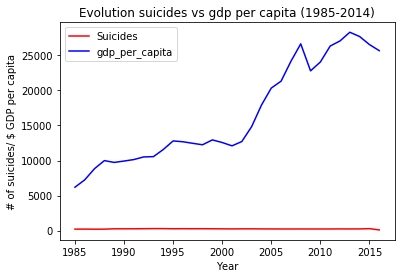

In [45]:
%matplotlib inline
plt.plot(df1['suicides_no']['mean'], label = 'Suicides', c='red')
plt.plot(df1['gdp_per_capita ($)']['mean'], label = 'gdp_per_capita', c='blue')
#print(sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"].plot())
plt.legend(loc=2)
plt.title('Evolution suicides vs gdp per capita (1985-2014)')
plt.xlabel('Year')
plt.ylabel('# of suicides/ $ GDP per capita')
plt.show()

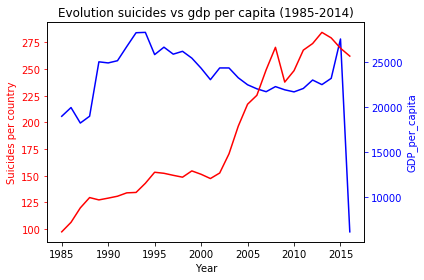

In [48]:
fig, ax1 = plt.subplots()
s1 = df1['suicides_no']['mean']
ax1.plot( s1, 'b-')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Suicides per country', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
s2 = df1['gdp_per_capita ($)']['mean']
ax2.plot(s2, 'r')
ax2.set_ylabel('GDP_per_capita', color='b')
ax2.tick_params('y', colors='b')

#plt.legend(loc=2)
plt.title('Evolution suicides vs gdp per capita (1985-2014)')
fig.tight_layout()
plt.show()

In [60]:
df2 = data_clean.groupby(['sex','generation']).agg(['sum','mean','std']).unstack(level=0).reset_index()#.reset_index()


In [51]:
#for i in df2['sex']:
 #   if i=='male': append 1
  #  else: append 0

In [58]:
#df2['numsex']=[1  if i=='male' else 0 for i in df2['sex']]
df2

generation     year                                               \
                          sum                  mean                    std   
sex                    female     male       female         male    female   
0            Boomers  4942078  4942078  2000.031566  2000.031566  8.415321   
1    G.I. Generation  2705202  2705202  1992.048601  1992.048601  4.711327   
2       Generation X  6334780  6334780  1999.614899  1999.614899  8.512443   
3       Generation Z  1459844  1459844  2010.804408  2010.804408  2.516765   
4         Millenials  5793683  5793683  2004.734602  2004.734602  6.737871   
5             Silent  6301599  6301599  2002.414681  2002.414681  7.632780   

              suicides_no                       ... suicides/100k pop  \
                      sum                 mean  ...              mean   
sex      male      female     male      female  ...            female   
0    8.415321      460962  1823490  186.548766  ...          5.851392   
1    4.711327      176653   333354  130.083211  ...         11.091399   
2    8.512443      309836  1222928   97.801768  ...          4.297607   
3    2.516765        6140     9764    8.457300  ...          0.523884   
4    6.737871      133619   489822   46.234948  ...          2.547370   
5    7.632780      472289  1309439  150.075945  ...          7.635558   

                                     gdp_per_capita ($)            \
                      std                           sum             
sex       male     female       male             female      male   
0    23.748130   4.887616  20.663686           39758027  39758027   
1    37.218814  13.601536  34.798631           14221689  14221689   
2    16.928078   4.346170  15.931072           49837410  49837410   
3     0.747631   0.886120   1.059118           18776652  18776652   
4     8.277478   3.666612  10.663760           55483345  55483345   
5    29.422469   8.636455  27.612018           55792201  55792201   

                                                             
             mean                         std                
sex        female          male        female          male  
0    16089.853096  16089.853096  18175.968404  18175.968404  
1    10472.525037  10472.525037  10812.995563  10812.995563  
2    15731.505682  15731.505682  17779.216074  17779.216074  
3    25863.157025  25863.157025  24475.359613  24475.359613  
4    19198.389273  19198.389273  20530.781032  20530.781032  
5    17728.694312  17728.694312  19322.349339  19322.349339  

[6 rows x 31 columns]

In [53]:
#pd.pivot_table(df2, values=['suicides_no']['sum'], columns=['sex'],aggfunc='sum')

In [54]:
#plt.barh(df3['generation'],df2['suicides/100k pop']['mean']['female'])

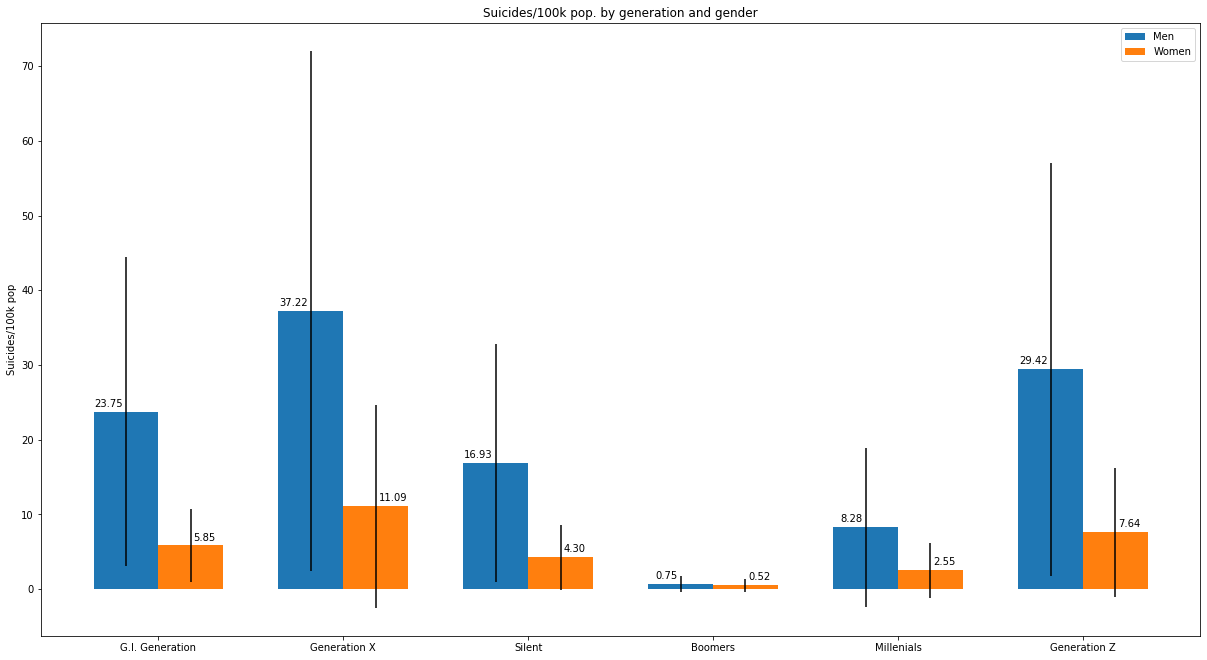

In [59]:

men_means, men_std = tuple(df2['suicides/100k pop']['mean']['male']), tuple(df2['suicides/100k pop']['std']['male'])
women_means, women_std = tuple(df2['suicides/100k pop']['mean']['female']), tuple(df2['suicides/100k pop']['std']['female'])

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means,  width, yerr=men_std, label='Men') # remove std 
rects2 = ax.bar(ind + width/2, women_means,  width, yerr=women_std, label='Women') # remove std 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Suicides/100k pop')
ax.set_title('Suicides/100k pop. by generation and gender')
ax.set_xticks(ind)
ax.set_xticklabels((tuple(set(df2['generation']))))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")


fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

fig.savefig('../presentacion/test2png.png')
plt.show()


In [51]:
data_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Language,Region
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Albanian,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Albanian,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Albanian,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Albanian,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Albanian,Europe


In [63]:
df3 = data_clean.groupby(['sex','Region']).agg(['sum','mean','std']).unstack(level=0).reset_index()#.reset_index()
df3.head()

Region      year                                                \
                    sum                   mean                    std   
sex              female      male       female         male    female   
0      Africa    851274    851274  2002.997647  2002.997647  8.642124   
1    Americas   8915604   8915604  2000.359883  2000.359883  8.698041   
2        Asia   5192604   5192604  2001.774865  2001.774865  8.266682   
3      Europe  11605764  11605764  2001.684029  2001.684029  8.313683   
4     Oceania    971940    971940  1999.876543  1999.876543  8.134513   

              suicides_no                       ... suicides/100k pop  \
                      sum                 mean  ...              mean   
sex      male      female     male      female  ...            female   
0    8.642124        2611     8744    6.143529  ...          3.041365   
1    8.698041      375754  1411741   84.306484  ...          3.285632   
2    8.266682      424613  1031123  163.690439  ...          5.929514   
3    8.313683      737739  2671120  127.240255  ...          7.108886   
4    8.134513       18782    66069   38.646091  ...          4.880556   

                                    gdp_per_capita ($)             \
                     std                           sum              
sex       male    female       male             female       male   
0    12.124776  4.864778  17.144262            2898074    2898074   
1    14.422715  5.304477  17.149371           42374956   42374956   
2    16.447020  9.648404  22.741253           39161796   39161796   
3    27.413822  7.477150  27.114342          139342030  139342030   
4    18.243107  4.012496  13.357022           10092468   10092468   

                                                             
             mean                         std                
sex        female          male        female          male  
0     6818.997647   6818.997647   3703.535573   3703.535573  
1     9507.506394   9507.506394  10672.318553  10672.318553  
2    15097.068620  15097.068620  19105.606753  19105.606753  
3    24032.775095  24032.775095  21690.493924  21690.493924  
4    20766.395062  20766.395062  17907.632375  17907.632375  

[5 rows x 31 columns]

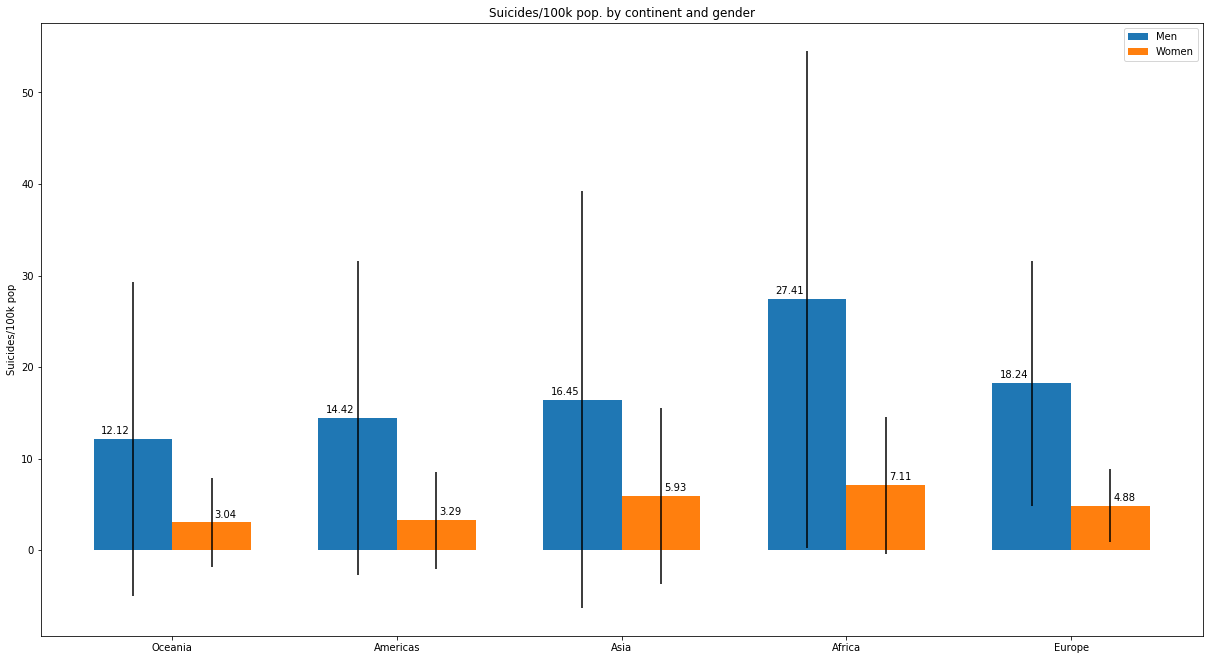

In [64]:
men_means, men_std = tuple(df3['suicides/100k pop']['mean']['male']), tuple(df3['suicides/100k pop']['std']['male'])
women_means, women_std = tuple(df3['suicides/100k pop']['mean']['female']), tuple(df3['suicides/100k pop']['std']['female'])

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means,  width, yerr=men_std, label='Men') # remove std 
rects2 = ax.bar(ind + width/2, women_means,  width, yerr=women_std, label='Women') # remove std 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Suicides/100k pop')
ax.set_title('Suicides/100k pop. by continent and gender')
ax.set_xticks(ind)
ax.set_xticklabels((tuple(set(df3['Region']))))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")


fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

fig.savefig('../presentacion/Suicides-per-contintent.png')
plt.show()